In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main_backtest import run_full_backtest
import statsmodels.api as sm
from cal_backtest_stats import *

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [12]:
params = {
    'start_year': 2010, 
    'end_year': 2024, 
    'top_corr_pairs': 20,
    'num_pairs': 15,
    'trigger_std': 1.96,
    'stoploss_std': 3.0
}
sr_LT_pct_ret = run_full_backtest(**params)
sr_nav = (100*(1+sr_LT_pct_ret).cumprod())

/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


<AxesSubplot:>

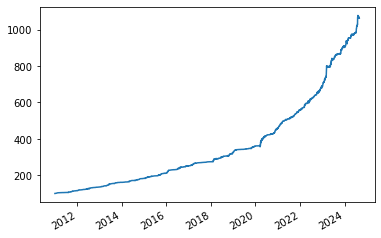

In [13]:
sr_nav.plot()

In [14]:
generate_stats_table(sr_nav.to_frame())

,0
Annualised Return,0.188858
Annualised Volatility,0.043354
Sharpe Ratio,4.356225
Max Drawdown,-0.025789
Max Drawdown/Vol Ratio,-0.594848
Sortino Ratio,7.591855
% +ve month,0.969512


Overall the backtest performance is very impressive, likely due to high hit ratio and diversification from having multiple pairs in the same portfolio. We test multiple parameters combinations and plot heatmaps to show how key stats change with parameters

In [20]:
from itertools import product
# run multiple parameters to test parameter sensitivity 
params_config = {
                'num_pairs': [1, 2, 5, 10, 15],   # number of pairs selected to test
                'trigger_std': [1.0, 1.5, 1.96], # entry position standard deviation
                'stoploss_std': [2.5, 3.0]     # stop loss standard deviation
                }  

# 4 * 3 * 2 = 24 combinations to test
all_params = [dict(zip(params_config, val))\
              for val in product(*params_config.values())]
records_dict = {}
for i, para in enumerate(all_params):
    print(i)
    sr_LT_pct_ret = run_full_backtest(**para)
    sr_nav = (100*(1+sr_LT_pct_ret).cumprod())
    stats_dict = cal_backtest_stats(sr_LT_pct_ret)
    para.update(stats_dict)
    records_dict[i] = para.copy()
df_all_records = pd.DataFrame(data=records_dict).T


0


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


1


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


2


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


3


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


4


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


5


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


6


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


7


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


8


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


9


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


10


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


11


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


12


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


13


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


14


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


15


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


16


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


17


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


18


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


19


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


20


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


21


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


22


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


23


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


24


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


25


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


26


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


27


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


28


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


29


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


In [22]:
df_all_records.to_csv('parameter_sensitivity_test_heatmaps/bakctest_all_records.csv')

In [23]:
df_all_records

,num_pairs,trigger_std,stoploss_std,cum_ret,ret,vol,sharpe,max_dd,max_dd_vol,sortino,pct_positive_month,pct_positive_yr
0,1.0,1.00,2.5,19.445046,0.242591,0.167723,1.446380,-0.171617,-1.023217,1.449888,0.682927,1.0
1,1.0,1.00,3.0,20.303540,0.246527,0.167951,1.467848,-0.171617,-1.021828,1.481308,0.682927,1.0
2,1.0,1.50,2.5,12.112160,0.200277,0.133773,1.497133,-0.117285,-0.876742,1.396791,0.536585,1.0
3,1.0,1.50,3.0,12.573779,0.203567,0.134014,1.519002,-0.117285,-0.875170,1.426377,0.530488,1.0
4,1.0,1.96,2.5,5.953414,0.139476,0.107835,1.293425,-0.101414,-0.940456,0.947736,0.329268,1.0
5,1.0,1.96,3.0,6.310263,0.144342,0.108307,1.332713,-0.101414,-0.936361,0.996837,0.341463,1.0
6,2.0,1.00,2.5,27.915000,0.275914,0.148674,1.855833,-0.168457,-1.133068,2.199597,0.774390,1.0
7,2.0,1.00,3.0,29.714540,0.281761,0.148877,1.892575,-0.168457,-1.131521,2.249560,0.774390,1.0
8,2.0,1.50,2.5,16.636653,0.228486,0.118062,1.935310,-0.089731,-0.760033,2.273662,0.689024,1.0
9,2.0,1.50,3.0,17.658147,0.233855,0.118286,1.977031,-0.089731,-0.758590,2.334888,0.689024,1.0
